In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import re

In [60]:
subject_number = 'Subject Number'
age = 'Age (Years)'
gender = 'Gender'
height = 'Reported Height (cm)'
weight = 'Reported Weight (kg)'
shoe_size = 'Shoe Size NL'
pants_size='Pants Size Waist'
#measurements
waist = 'Waist Circumference, Pref (mm)'
neck='Neck Base Circumference (mm)'
hip= 'Hip Circumference, Maximum (mm)'
chest='Chest Circumference (mm)' #measured just on nipples
crotch_height='Crotch Height (mm)'
shoe_size_italy="Shoe Size IT"

upper_chest='Chest Girth (Chest Circumference at Scye) (mm)' #measured above nipple
italy_upper_chest="Chest Girth at Scye (Chest Circumference at Scye) (mm)"
malleolus_height_outer="Ankle Ht Rt (Malleolus, Lateral) (mm)"
malleolus_height_inner='Malleolus Med Rt (mm)'
outer_inseam='Outer Inseam'


thigh='Thigh Circumference (mm)'
shoulder_breadth='Shoulder Breadth (mm)'
waist_floor='Waist Height, Preferred (mm)'
arm_length='Arm Length (Shoulder to Wrist) (mm)'

rectangle='Rectangle'
triangle='Triangle'
inverted_triangle='Inverted Triangle'

In [61]:
demographic_path = "./dutch/demographic_metric.csv"
measurement_path = "./dutch/measurement_metric.csv"
extracted_path='./dutch/DutchExtracted.csv'

italy_demographic_path="./italy/ItalyDemographics_csv.csv"
italy_extracted_path='./italy/ItalyExtracted.csv'
italy_demographic_path="ItalyDemographics.csv"
italy_measurement_path="./italy/ItalyMeasurements_csv.csv"

In [62]:
demographic=[subject_number,gender,age, height, weight, shoe_size,pants_size]
extracted=[subject_number,malleolus_height_inner,malleolus_height_outer]
mearuments=[subject_number,waist,chest,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,upper_chest]
italy_demographic=[subject_number,gender,age, height, weight, shoe_size_italy,pants_size]
italy_measurements=[subject_number,waist,chest,neck,hip,crotch_height,thigh,shoulder_breadth,waist_floor,arm_length,italy_upper_chest]
additional=[subject_number,pants_size]

#M_data=pd.read_csv(measurement_path,skipinitialspace=True)

DUTCH

In [63]:
demographic_data=pd.read_csv(demographic_path,skipinitialspace=True,usecols=demographic)
measurement_data=pd.read_csv(measurement_path,skipinitialspace=True,usecols=mearuments)
measurement_data=measurement_data[mearuments]
demographic_data=demographic_data.loc[demographic_data[gender]=='Male'] #shape  Male (567,6) Female (700,6)

data = demographic_data.merge(measurement_data, on=subject_number, how='left') #shape (567, *)

# data = data.drop(subject_number, axis=1)

data=data.drop(gender,axis=1)

dutch_extracted=pd.read_csv(extracted_path,skipinitialspace=True,usecols=extracted)

data=data.merge(dutch_extracted,on=subject_number,how='left')

print(data.shape)

data.head()

(567, 18)


,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
0,11012,24,206.00,110.00,47,36,916.0,1004.0,506.0,1091.0,1005.0,655.0,505.0,1224.0,712.0,1031.0,NaN,NaN
1,11024,32,184.00,100.00,45,34,867.0,1099.0,482.0,1090.0,890.0,660.0,535.0,1101.0,672.0,1138.0,64.89,90.70
2,11025,56,187.00,82.00,44,33,886.0,983.0,492.0,966.0,856.0,571.0,473.0,1067.0,645.0,1004.0,70.71,93.46
3,11029,60,178.00,98.00,43,38,1036.0,1153.0,500.0,1056.0,797.0,619.0,462.0,1043.0,608.0,1069.0,71.62,87.41
4,11033,33,184.00,85.00,43,34,930.0,1021.0,575.0,NaN,831.0,610.0,461.0,1049.0,618.0,1039.0,72.37,91.72


In [64]:
data.dropna(axis=0,how='any',inplace=True) # shape (564,*)
data=data[data[height].str.contains("No Response")==False]
data = data[data[weight].str.contains("No Response") == False]
data = data[data[shoe_size].str.contains("No Response") == False]
data = data[data[pants_size].str.contains("No Response") == False]
total_features=data.shape[1]-1
features = data.columns.tolist()

target = features[-12:] #get last column

    #features = list(set(features) - set([target]))
features = features[:-12]
data[height] = pd.to_numeric(data[height])
data[weight]=pd.to_numeric(data[weight])
data[shoe_size]=pd.to_numeric(data[shoe_size])
data[pants_size]=pd.to_numeric(data[pants_size])
print(features)


['Subject Number', 'Age (Years)', 'Reported Height (cm)', 'Reported Weight (kg)', 'Shoe Size NL', 'Pants Size Waist']


In [65]:
data.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
1,11024,32,184.0,100.0,45.0,34,867.0,1099.0,482.0,1090.0,890.0,660.0,535.0,1101.0,672.0,1138.0,64.89,90.70
2,11025,56,187.0,82.0,44.0,33,886.0,983.0,492.0,966.0,856.0,571.0,473.0,1067.0,645.0,1004.0,70.71,93.46
3,11029,60,178.0,98.0,43.0,38,1036.0,1153.0,500.0,1056.0,797.0,619.0,462.0,1043.0,608.0,1069.0,71.62,87.41
9,11074,45,180.0,70.0,41.0,32,809.0,891.0,464.0,938.0,842.0,558.0,444.0,1071.0,626.0,924.0,67.71,86.76
12,11099,33,176.0,70.0,42.0,32,850.0,929.0,449.0,963.0,816.0,556.0,445.0,1004.0,637.0,961.0,68.64,88.00


ITALY


In [66]:

italy_demographic_data=pd.read_csv(italy_demographic_path,skipinitialspace=True,usecols=italy_demographic)
italy_measurement_data=pd.read_csv(italy_measurement_path,skipinitialspace=True,usecols=italy_measurements)
italy_measurement_data.rename(columns = {italy_upper_chest:upper_chest}, inplace = True)
italy_measurement_data=italy_measurement_data[mearuments]
italy_demographic_data=italy_demographic_data.loc[italy_demographic_data[gender]=='Male'] 

italy_demographic_data.columns=[subject_number,age,gender,height,weight,shoe_size,pants_size]
italy_data=italy_demographic_data.merge(italy_measurement_data,on=subject_number,how='left')
italy_extracted=pd.read_csv(italy_extracted_path,skipinitialspace=True,usecols=extracted)

italy_data=italy_data.merge(italy_extracted,on=subject_number,how='left')
#italy_data=italy_data.drop(subject_number,axis=1)
italy_data=italy_data.drop(gender,axis=1)
italy_data.head()


,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
0,4000,30.5,172.0,72.0,41.0,Don't Know,826.0,965.0,490.0,930.0,794.0,556.0,427.0,995.0,620.0,967.0,68.0,85.0
1,4001,30.3,175.0,72.0,42.0,Don't Know,814.0,936.0,478.0,967.0,797.0,547.0,447.0,1015.0,625.0,941.0,70.0,86.0
2,4004,18.1,179.0,67.0,41.0,35.4,787.0,917.0,470.0,940.0,849.0,553.0,410.0,1076.0,613.0,902.0,72.0,78.0
3,4007,38.0,178.0,76.0,41.5,Don't Know,888.0,1050.0,505.0,1002.0,808.0,579.0,463.0,999.0,640.0,1037.0,62.0,75.0
4,4011,18.5,173.0,71.0,43.0,29.5,786.0,967.0,504.0,888.0,752.0,536.0,458.0,957.0,598.0,1028.0,68.0,85.0


In [67]:
print(italy_data.shape)
italy_data=italy_data[italy_data[shoe_size].str.contains("44 or Larger|35 or Smaller")==False]
# italy_data=italy_data[italy_data[pants_size].str.contains("Don't Know|29.5 or Smaller|63 or Larger")==False]
# italy_data = italy_data[italy_data[pants_size].str.contains("No Response") == False]
italy_data.dropna(axis=0,how='any',inplace=True)
italy_data[shoe_size]=pd.to_numeric(italy_data[shoe_size])
# italy_data[pants_size]=pd.to_numeric(italy_data[pants_size])
italy_data.head()
print(italy_data.shape)

(413, 18)
(332, 18)


In [78]:

combined = [data, italy_data]
result = pd.concat(combined)
X = result[features]
y = result[target]
X.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist
1,11024,32.0,184.0,100.0,45.0,34
2,11025,56.0,187.0,82.0,44.0,33
3,11029,60.0,178.0,98.0,43.0,38
9,11074,45.0,180.0,70.0,41.0,32
12,11099,33.0,176.0,70.0,42.0,32


In [79]:



def check_ratio(upper_chest,waist):
    ratio=upper_chest/waist
    
    if ratio >=1.1 and ratio<=1.2: #measurement is within 20% of each other
        return rectangle
    elif ratio<1.1:
        return triangle
    else:
        return inverted_triangle

In [80]:
chest_waist=y[[upper_chest,waist]]
#loop through each row and check ratio
chest_waist['shape']=chest_waist.apply(lambda row: check_ratio(row[upper_chest],row[waist]),axis=1)




/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_13382/482272390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_waist['shape']=chest_waist.apply(lambda row: check_ratio(row[upper_chest],row[waist]),axis=1)


In [81]:
#count number of each ratio
chest_waist['shape'].value_counts()
chest_waist.head()
#cound number of each ratio
chest_waist['shape'].value_counts()


Rectangle            352
Inverted Triangle    170
Triangle             169
Name: shape, dtype: int64

In [82]:
chest_waist.head()

,Chest Girth (Chest Circumference at Scye) (mm),"Waist Circumference, Pref (mm)",shape
1,1138.0,867.0,Inverted Triangle
2,1004.0,886.0,Rectangle
3,1069.0,1036.0,Triangle
9,924.0,809.0,Rectangle
12,961.0,850.0,Rectangle


In [83]:

chest_waist.head()
encoder=preprocessing.OneHotEncoder().fit_transform(chest_waist['shape'].values.reshape(-1,1)).toarray()
#convert list to dataframe
# print(encoder)
chest_waist[inverted_triangle]=encoder[:,0]
chest_waist[rectangle]=encoder[:,1]
chest_waist[triangle]=encoder[:,2]
# encoder=pd.DataFrame(encoder)
# #rename columns
# encoder.columns=[inverted_triangle,rectangle]
# #merge with chest_waist dataframe
# chest_waist=chest_waist.merge(encoder)
chest_waist.head()


/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_13382/313968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_waist[inverted_triangle]=encoder[:,0]
/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_13382/313968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_waist[rectangle]=encoder[:,1]
/var/folders/vp/xlqp6dbd0fl_qfy9thbvg9zc0000gn/T/ipykernel_13382/313968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,Chest Girth (Chest Circumference at Scye) (mm),"Waist Circumference, Pref (mm)",shape,Inverted Triangle,Rectangle,Triangle
1,1138.0,867.0,Inverted Triangle,1.0,0.0,0.0
2,1004.0,886.0,Rectangle,0.0,1.0,0.0
3,1069.0,1036.0,Triangle,0.0,0.0,1.0
9,924.0,809.0,Rectangle,0.0,1.0,0.0
12,961.0,850.0,Rectangle,0.0,1.0,0.0


In [84]:
chest_waist=chest_waist.drop(upper_chest,axis=1)
chest_waist=chest_waist.drop(waist,axis=1)
chest_waist.head()


,shape,Inverted Triangle,Rectangle,Triangle
1,Inverted Triangle,1.0,0.0,0.0
2,Rectangle,0.0,1.0,0.0
3,Triangle,0.0,0.0,1.0
9,Rectangle,0.0,1.0,0.0
12,Rectangle,0.0,1.0,0.0


In [91]:
# features.append(inverted_triangle)
# features.append(rectangle)
# features.append(triangle)
X=pd.concat([X,chest_waist],axis=1,join='inner')
X.head()
#merge X with chest_waist using index
# X=X.merge(chest_waist,left_index=True)

# X.head()

,Subject Number,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,Pants Size Waist,shape,Inverted Triangle,Rectangle,Triangle
1,11024,32.0,184.0,100.0,45.0,34,Inverted Triangle,1.0,0.0,0.0
2,11025,56.0,187.0,82.0,44.0,33,Rectangle,0.0,1.0,0.0
3,11029,60.0,178.0,98.0,43.0,38,Triangle,0.0,0.0,1.0
9,11074,45.0,180.0,70.0,41.0,32,Rectangle,0.0,1.0,0.0
12,11099,33.0,176.0,70.0,42.0,32,Rectangle,0.0,1.0,0.0


In [93]:
#Train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
#Train and validation
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.20,random_state=42)

additional_df=pd.concat([X_test[subject_number],X_test[pants_size],X_test['shape']],axis=1)
X_test=X_test.drop(subject_number,axis=1)
X_test=X_test.drop(pants_size,axis=1)
X_train=X_train.drop(subject_number,axis=1)
X_train=X_train.drop(pants_size,axis=1)
X_val=X_val.drop(subject_number,axis=1)
X_val=X_val.drop(pants_size,axis=1)

In [94]:
X_train.head()

,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,shape,Inverted Triangle,Rectangle,Triangle
188,19.2,170.0,56.0,41.0,Rectangle,0.0,1.0,0.0
324,33.0,187.0,83.0,43.0,Rectangle,0.0,1.0,0.0
476,30.0,185.0,78.0,43.0,Rectangle,0.0,1.0,0.0
370,21.9,182.0,58.0,43.5,Triangle,0.0,0.0,1.0
77,26.0,173.0,70.0,42.0,Inverted Triangle,1.0,0.0,0.0


In [95]:
X_train.to_csv("X_train.csv",encoding='utf-8',index=False)
y_train.to_csv("y_train.csv",encoding='utf-8',index=False)

X_test.to_csv("X_test.csv",encoding='utf-8',index=False)
y_test.to_csv("y_test.csv",encoding='utf-8',index=False)

X_val.to_csv("X_val.csv",encoding='utf-8',index=False)
y_val.to_csv("y_val.csv",encoding='utf-8',index=False)

additional_df.to_csv("additional_df.csv",encoding='utf-8',index=False)

In [96]:
#read csv file
test=pd.read_csv("X_train.csv",encoding='utf-8')
test.head()

,Age (Years),Reported Height (cm),Reported Weight (kg),Shoe Size NL,shape,Inverted Triangle,Rectangle,Triangle
0,19.2,170.0,56.0,41.0,Rectangle,0.0,1.0,0.0
1,33.0,187.0,83.0,43.0,Rectangle,0.0,1.0,0.0
2,30.0,185.0,78.0,43.0,Rectangle,0.0,1.0,0.0
3,21.9,182.0,58.0,43.5,Triangle,0.0,0.0,1.0
4,26.0,173.0,70.0,42.0,Inverted Triangle,1.0,0.0,0.0


In [97]:
additional_df.head()

,Subject Number,Pants Size Waist,shape
23,4052,37.4,Rectangle
394,4749,35.4,Triangle
444,16674,32,Rectangle
543,17049,32,Rectangle
521,16893,31,Rectangle


In [98]:
y_test.head()

,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm),"Ankle Ht Rt (Malleolus, Lateral) (mm)",Malleolus Med Rt (mm)
23,936.0,1025.0,500.0,1020.0,741.0,610.0,475.0,933.0,573.0,1065.0,60.00,80.00
394,880.0,973.0,456.0,1018.0,785.0,580.0,458.0,1052.0,628.0,964.0,74.00,87.00
444,857.0,948.0,472.0,1018.0,874.0,559.0,471.0,1110.0,678.0,990.0,78.41,85.86
543,813.0,908.0,466.0,974.0,835.0,555.0,471.0,1082.0,637.0,936.0,82.14,98.63
521,833.0,910.0,444.0,988.0,865.0,549.0,459.0,1045.0,655.0,931.0,89.28,104.41


In [99]:
measurement_data.head()

,Subject Number,"Waist Circumference, Pref (mm)",Chest Circumference (mm),Neck Base Circumference (mm),"Hip Circumference, Maximum (mm)",Crotch Height (mm),Thigh Circumference (mm),Shoulder Breadth (mm),"Waist Height, Preferred (mm)",Arm Length (Shoulder to Wrist) (mm),Chest Girth (Chest Circumference at Scye) (mm)
0,11001,724.0,904.0,444.0,1000.0,799.0,565.0,406.0,1053.0,603.0,844.0
1,11002,690.0,859.0,401.0,1027.0,754.0,607.0,429.0,1004.0,566.0,870.0
2,11009,1014.0,1092.0,452.0,1135.0,739.0,654.0,460.0,1014.0,573.0,1011.0
3,11012,916.0,1004.0,506.0,1091.0,1005.0,655.0,505.0,1224.0,712.0,1031.0
4,11017,755.0,898.0,438.0,985.0,808.0,579.0,432.0,1014.0,568.0,891.0


In [25]:
# def  isWithInPercentage(chest,waist,range):
#     p=0
#     p=(abs(chest-waist)/(((chest+waist))/2))
#     # p = abs(chest - waist)/max(chest, waist) 
#     print(p)
#     print(p<=range/100)
    

In [26]:
def plot_eplorror_distribution(array):
    plt.subplots(figsize=(8,5))
    #Set X-Axis range
    
    plt.title('Model Error Distribution')
    plt.ylabel('No. of Predictions')
    plt.xlabel('Error (cm)')
    plt.hist(array)
    plt.show()

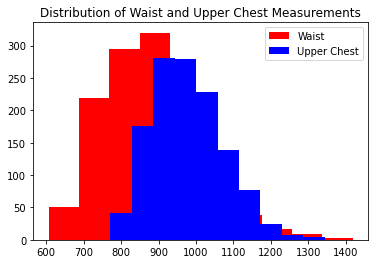

In [27]:
plt.hist(measurement_data[waist], color='red')
plt.hist(measurement_data[upper_chest],  color='blue')
  
plt.title("Distribution of Waist and Upper Chest Measurements")
  
plt.legend([ 'Waist', 'Upper Chest'])
  
plt.show()

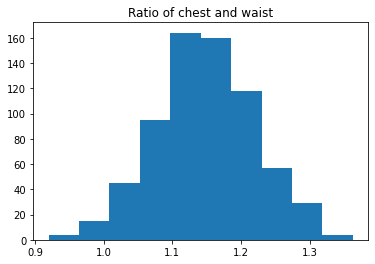

In [28]:
ratio=result[upper_chest]/result[waist]
plt.hist(ratio)
plt.title("Ratio of chest and waist")
  

  
plt.show()